# Analysis of Coronavirus Data

In this notebook I compare the coronavirus statistics for each country to their respective scores on [Hofstede's cultural dimensions](https://en.wikipedia.org/wiki/Hofstede%27s_cultural_dimensions_theory). I will visualize the results, comment on any strong correlations, and attempt to give explanations where possible.

## Imports

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
%matplotlib inline

## Read CSV Files

In [4]:
factors = pd.read_csv('factors.csv')
fit_data = pd.read_csv('fit_data.csv')

In [5]:
factors.head()

,Unnamed: 0,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Croatia,Czech Republic,Denmark,Estonia,Finland,France,Germany,United Kingdom,Greece,Hungary,Indonesia,Iran,Ireland,Italy,Japan,South Korea,Latvia,Lithuania,Luxembourg,Malaysia,Malta,Mexico,Morocco,Netherlands,New Zealand,Norway,Pakistan,Poland,Portugal,Romania,Russia,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,United States,Uruguay
0,pdi,49,38,11,65,69,39,63,80,67,73,57,18,40,33,68,35,35,60,46,78,58,28,50,54,60,44,42,40,104,56,81,70,38,22,31,55,68,63,90,93,86,104,71,57,31,34,58,64,66,40,61
1,idv,46,90,55,75,38,80,23,20,13,33,58,74,60,63,71,67,89,35,80,14,41,70,76,46,18,70,60,60,26,59,30,46,80,79,69,14,60,27,30,39,25,52,27,51,71,68,17,20,37,91,36
2,mas,56,61,79,54,49,52,28,66,64,40,57,16,30,26,43,66,66,57,88,46,43,68,70,95,39,9,19,50,50,47,69,53,14,58,8,50,64,31,42,36,43,110,19,42,5,70,45,34,45,62,38
3,uai,86,51,70,94,76,48,86,30,80,80,74,23,60,59,86,65,35,112,82,48,59,35,75,92,85,63,65,70,36,96,82,68,53,49,50,70,93,104,90,95,92,51,88,86,29,58,69,64,85,46,100
4,ltowvs,20,21,60,82,44,36,31,87,13,58,70,35,82,38,63,83,51,45,58,62,14,24,61,88,100,69,82,64,41,47,24,14,67,33,35,50,38,28,52,81,52,77,49,48,53,74,93,32,46,26,26


## Use population data for normalization

In [6]:
# from worldometers.info
population = ['population', 45195774, 25499884, 9006398, 11589623, 212559417, 37742145, 19116201, 1439323776, 50882891, 4105267, 10708981, 5792202, 1326535, 5540720, 65273511, 83783942, 67886011, 10423054, 9660351, 273523615, 83992949, 4937786, 60461826, 126476461, 51269185, 1886198, 2722289, 625978, 32365999, 441543, 128932753, 36910560, 17134872, 4822233, 5421241, 220892340, 37846611, 10196709, 19237691, 145934462, 8737371, 5459642, 2078938, 46754778, 10099265, 8654622, 23816775, 69799978, 84339067, 331002651, 3473730]
population = pd.DataFrame(population).transpose()
population.columns = factors.columns
population.index = [5]

In [7]:
frames = [factors, population, fit_data]
all_data = pd.concat(frames, sort=True)
all_data.index = all_data['Unnamed: 0']
all_data = all_data.drop('Unnamed: 0', axis=1)
del all_data.index.name
all_data = all_data.transpose()
all_data['b/g'] = all_data['b']/all_data['g']
all_data['norm cases'] = all_data['proj cases']/all_data['population']

## Normalize all columns using min-max normalization

In [8]:
for col in all_data.columns:
    max_stat = all_data[col].max()
    min_stat = all_data[col].min()
    
    f = lambda x: (x-min_stat)/(max_stat-min_stat)
    all_data[col] = all_data[col].apply(f)

## Visualize correlations

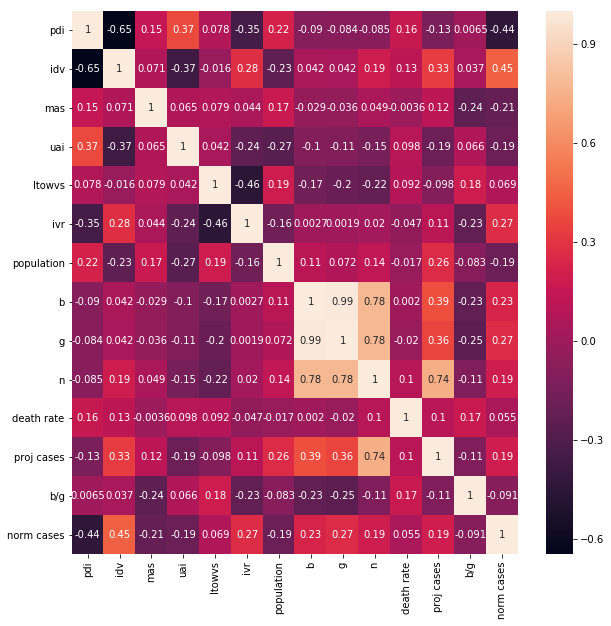

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(all_data.corr(), annot = True)

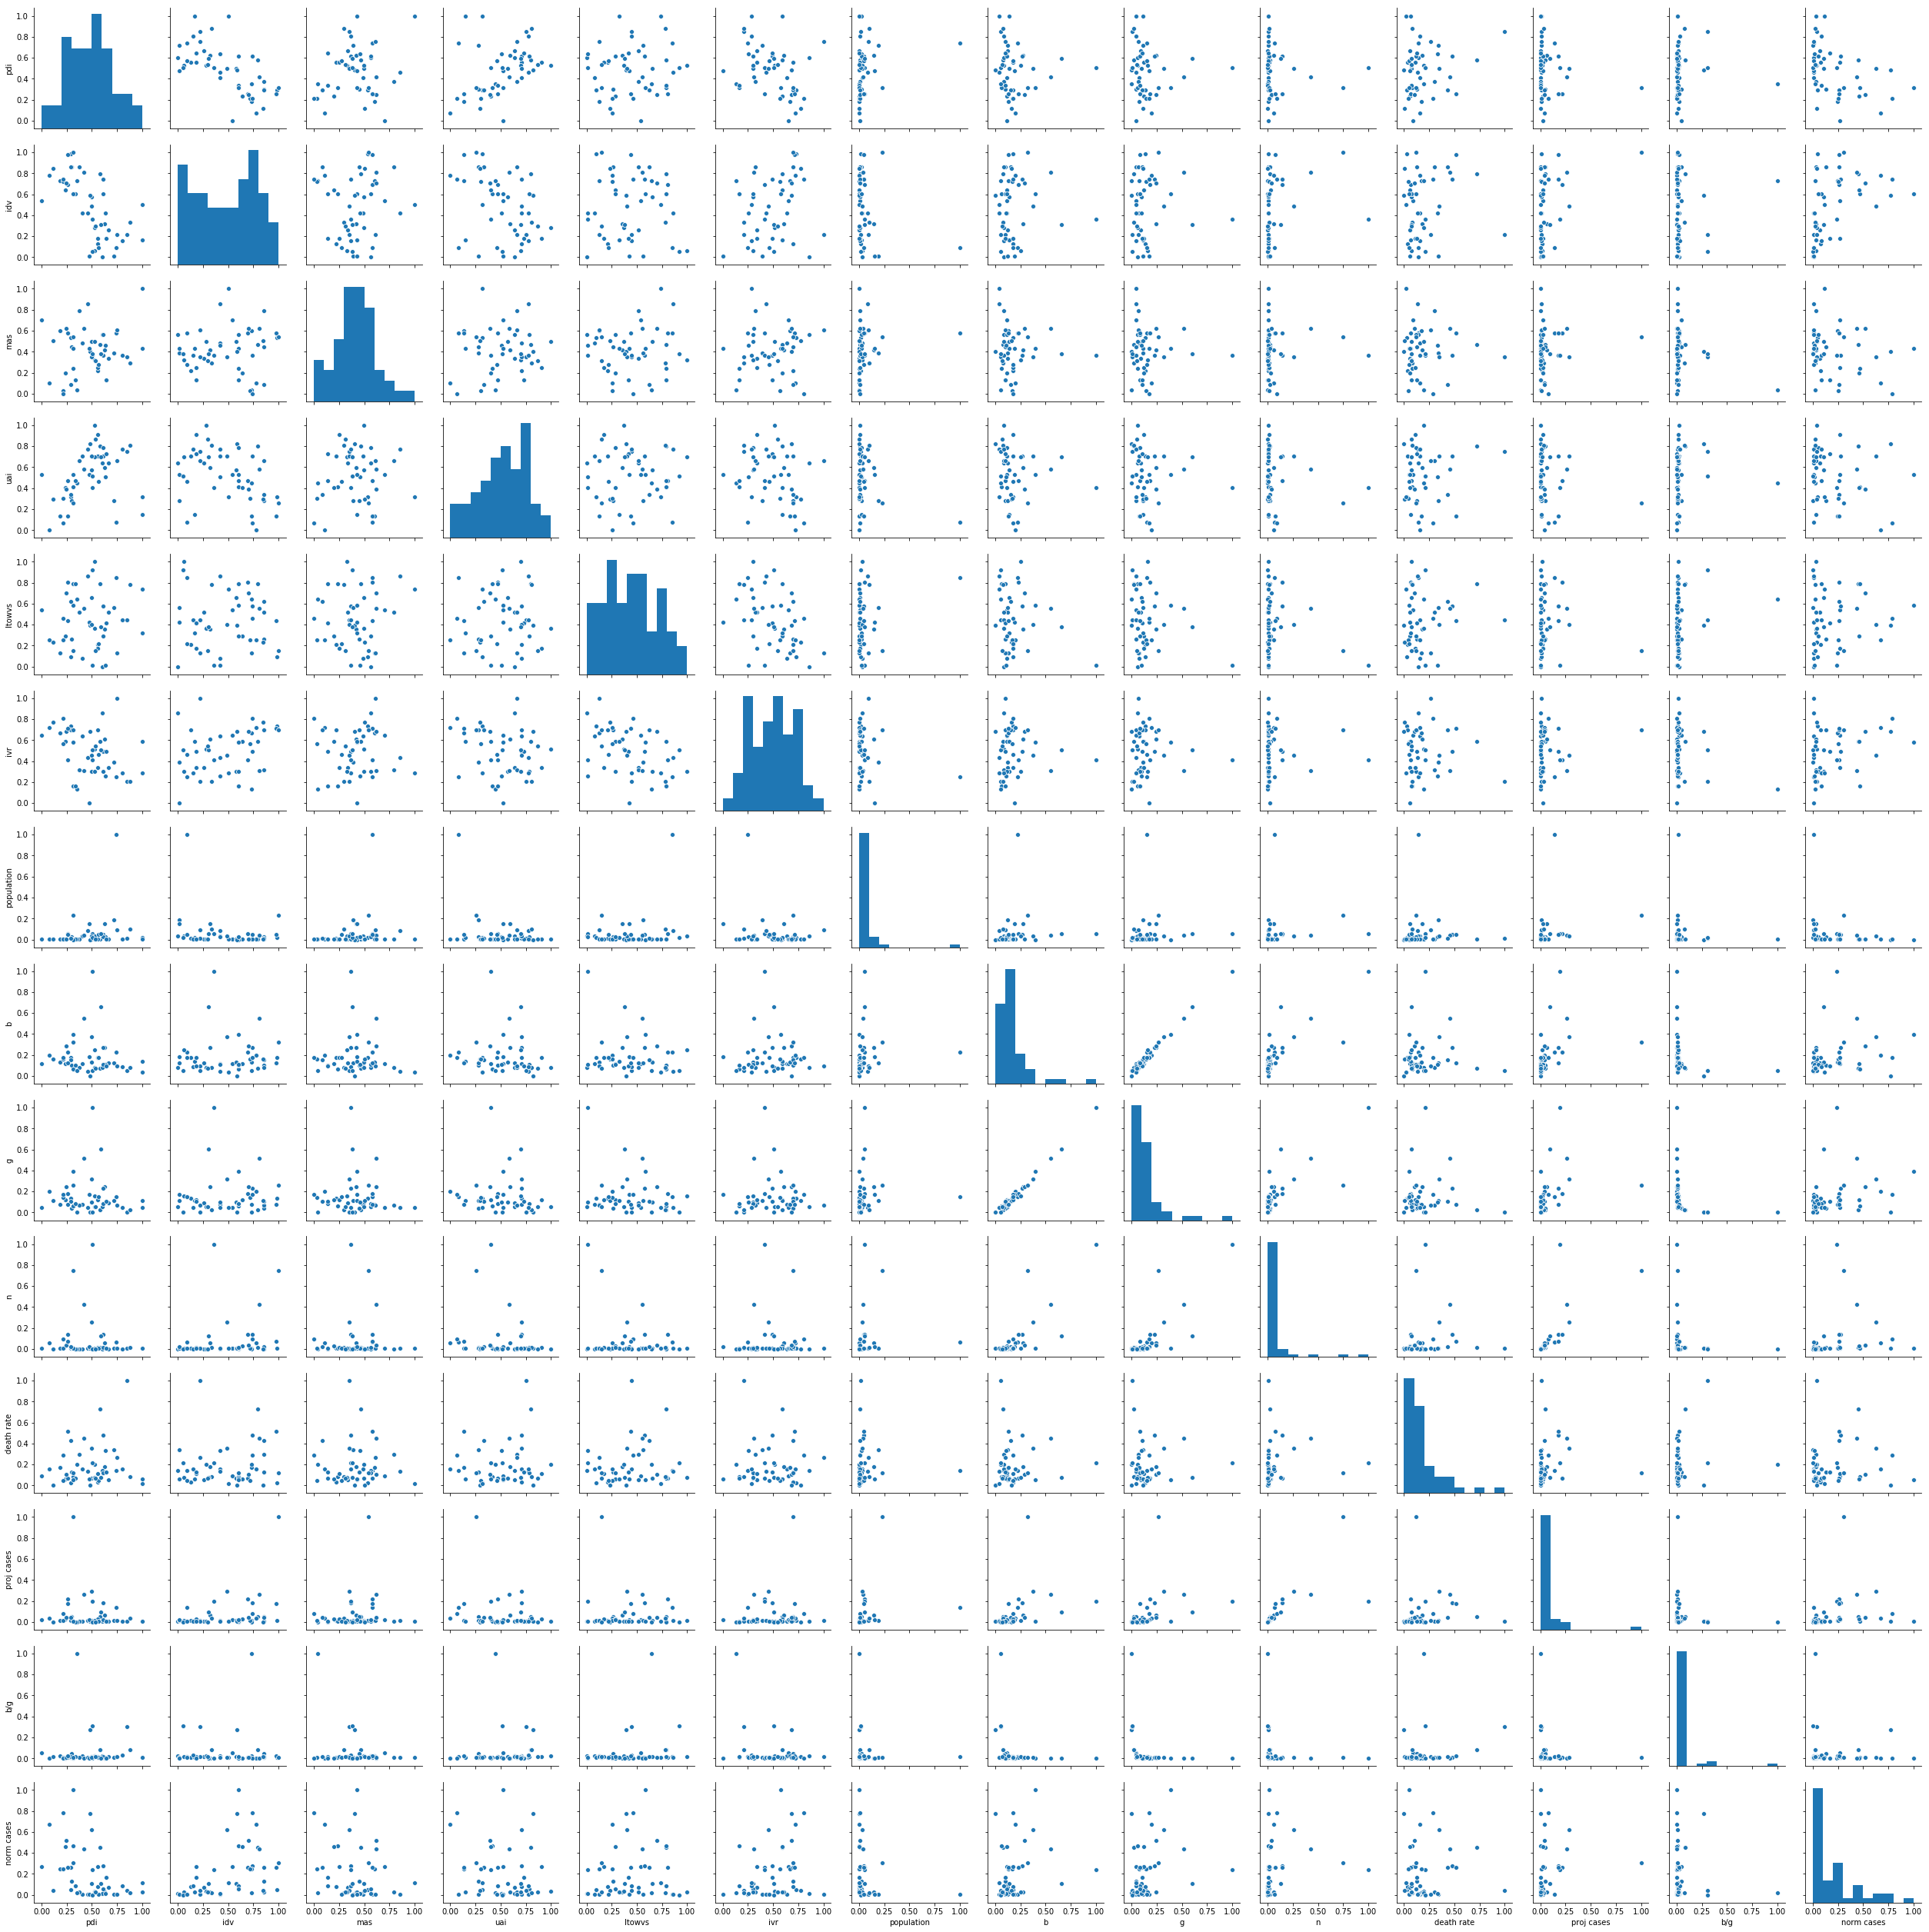

In [10]:
sns.pairplot(all_data)

## Observations

### Individualism and Power Distance Index

The best predictors of a high case count are a culture which emphasizes individualism and distributes power more evenly among all individuals. Some examples of cultures with these characteristics are the United States, Denmark, and Australia. 

It may be that countries with more evenly distributed power struggled to contain the spread of the disease more than others because their governments were more hesitant to institute harsh lockdown measures. They may also have had more concern for the civil rights of their people, thus limiting their options for tracking and containing the virus. 

Countries with a high level of individualism might have struggled to instute lockdown measures. They likely had more people break quarantine, valuing their own rights more than the collective wellbeing of the popultaion. 

On the other hand, these correlations could be artifacts of the way I modelled the data. It could be that the countries with more individualism and more evenly distributed power were more honest in reporting their statistics. These countries tend to be functional democracies with open, honest governments. Their more honest reporting of numbers may have caused an artificially inflated case count relative to the other countries.

### Correlation Between Population and Projected Cases

By using the SIR model to determine the progression of the disease, I implicity assumed that the disease was contained to small communities within each country. The fact that the correlation between population and projected cases was only 0.26 tells me that this assumption was somewhat correct. If it were entirely true we would expect 0 correlation between the two, and if it where spreading throughout each country their correlation would be 1.